In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import datetime as dt


In [10]:
df_market = pd.read_csv("marketing_campaign 2.csv", delimiter="\t")

In [11]:
df_market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df_market["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
def cleaning(df_market):
    df_market["Education"] = df_market["Education"].apply(lambda x: 1 if x == "Graduation" else 2 if x == "PhD" else 3 if x == "Master" else 4 if x == "2n Cycle" else 4 if x == "Basic" else 0)
    df_market["Marital_Status"] = df_market["Marital_Status"].apply(lambda x: 1 if x == "Married" else 2 if x == "Together" else 3 if x == "Single" else 4 if x == "Divorced" else 5 if x == "Widow" else 6 if x == "Alone" else 7 if x == "Absurd" else 8 if x == "YOLO" else 9)
    return df_market

In [14]:
# Don't have as function since  I don't believe it is needed or possible
df_market["Dt_Customer"] = pd.to_datetime(df_market["Dt_Customer"], format="%d-%m-%Y")
df_market["year"] = df_market["Dt_Customer"].dt.year
df_market["month"] = df_market["Dt_Customer"].dt.month
df_market["day"] = df_market["Dt_Customer"].dt.day




In [15]:
cleaning(df_market)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day
0,5524,1957,1,3,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,1,3,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,1,2,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,1,2,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,2,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,1,24


In [16]:
# Function not possible or even needed
df_market = df_market.drop(columns = ["NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Z_CostContact",'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', "year", "day", "Dt_Customer"])

In [65]:
def null(info: pd.DataFrame) -> pd.DataFrame:
    df_market[info] = df_market[info].fillna(df_market[info].median())

null("Income")

In [66]:
df_market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Z_Revenue,Response,month
0,5524,1957,1,3,58138.0,0,0,58,635,8,10,4,11,1,9
1,2174,1954,1,3,46344.0,1,1,38,11,1,1,2,11,0,3
2,4141,1965,1,2,71613.0,0,0,26,426,8,2,10,11,0,8
3,6182,1984,1,2,26646.0,1,0,26,11,2,0,4,11,0,2
4,5324,1981,2,1,58293.0,1,0,94,173,5,3,6,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,46,709,9,3,4,11,0,6
2236,4001,1946,2,2,64014.0,2,1,56,406,8,2,5,11,0,6
2237,7270,1981,1,4,56981.0,0,0,91,908,2,3,13,11,0,1
2238,8235,1956,3,2,69245.0,0,1,8,428,6,5,10,11,0,1


In [67]:
print(df_market.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Z_Revenue', 'Response',
       'month'],
      dtype='object')


In [68]:
df_market.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Z_Revenue', 'Response',
       'month'],
      dtype='object')

For preprocessing I dropped the not needed columns as they where getting in the way. I also created a lambda function to change the categorical data of Marital status and Education as well as pulling out the month in the time column and changing the datatype of month to a float. For the null values of Income I filled it with the mean of the column.

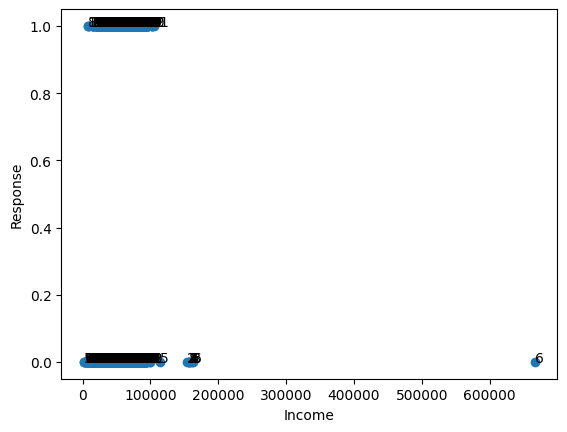

In [75]:

def selection(answer: pd.DataFrame) -> pd.DataFrame:
    X = df_market.drop(answer, axis= 1)
    y = df_market[answer]

    plt.scatter(X["Income"], X["Response"])

    for i, txt in enumerate(y):
        plt.annotate(txt, (X["Income"][i], X["Response"][i]))

    plt.xlabel("Income")
    plt.ylabel("Response")
    plt.show()

selection("month")



In [ ]:
def K_Means(plot):

    X = df_market.drop("month", axis= 1)
    y = df_market["month"]

    inertias = []
    distortions = []


    for k in range(1,10):
        model = KMeans(n_clusters=k).fit(X)
        distance = cdist(X, model.cluster_centers_, "euclidean")
        distortion = sum(np.min(distance, axis=1))/X.shape[0]
        distortions.append(distortion)
        inertia = model.inertia_
        inertias.append(inertia)
    if plot == "distortion":
        plt.plot(range(1,10), distortion)
        plt.title("Elbow Method with Distortion")
    if plot == "inertia":
        plt.plot(range(1,10), inertia)
        plt.title("Elbow Method with Inertia")

K_Means("distortion")

In [ ]:
print(df_market.dtypes)

ID                       int64
Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Z_Revenue                int64
Response                 int64
month                    int32
dtype: object


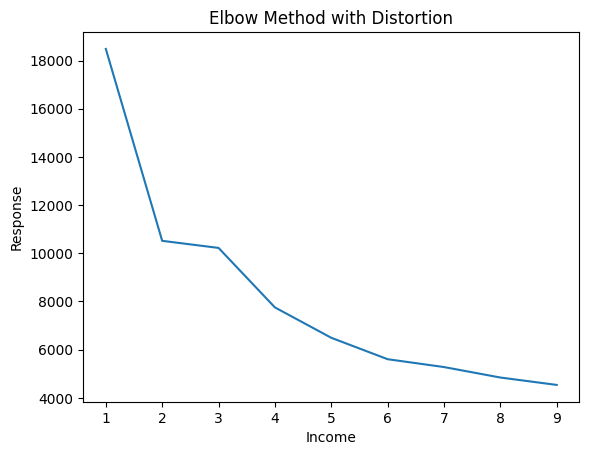

In [ ]:
def Dist(r1, r2):
    plt.plot(range(r1, r2), distortions)
    plt.xlabel("Income")
    plt.ylabel("Response")
    plt.title("Elbow Method with Distortion")

Dist(1,10)

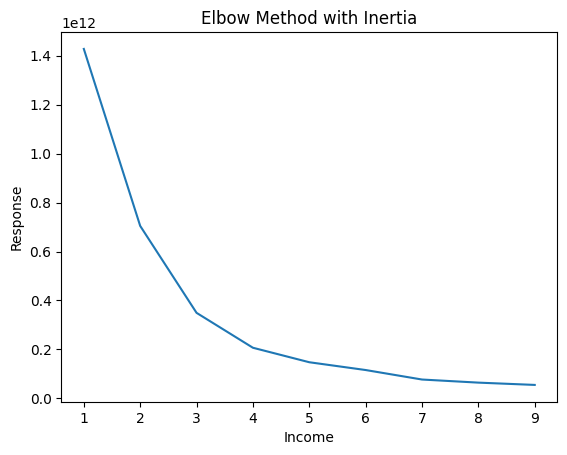

In [ ]:
def Inert(r1, r2):
    plt.plot(range(r1, r2), inertias)
    plt.xlabel("Income")
    plt.ylabel("Response")
    plt.title("Elbow Method with Inertia")

Inert(1, 10)

I did not look at all the data because not all the data will be completely useful or substantial. So I used a subset of data that got rid of the usless columns that can be see from my dropped columns code. I found the ideal number of clusters by looking at my elbow graph and noticing where the graph evened out and wasn't a sharp increase. I found the range of 4-6 and plugged in to see which number of clusters was best 5

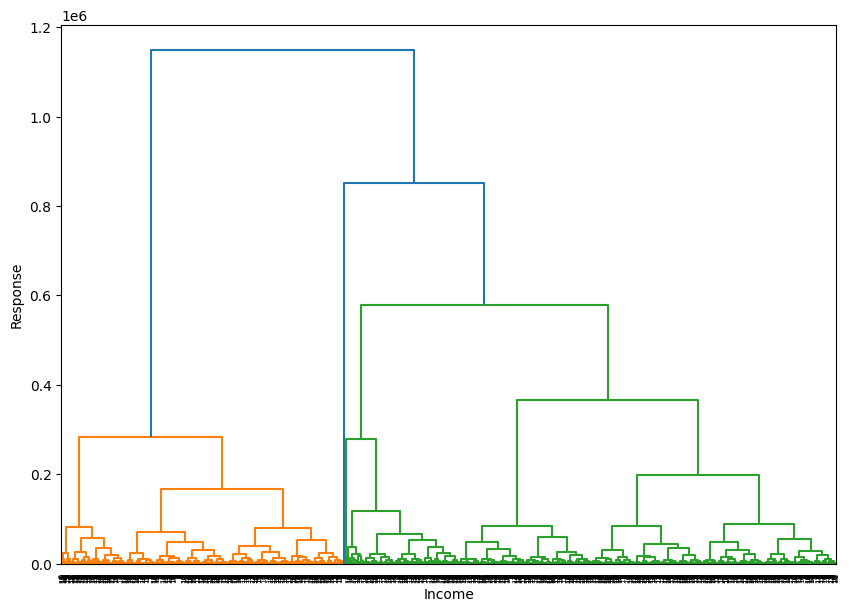

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
def Dendo(select):
    linked = linkage(X, select)
    plt.figure(figsize=(10,7))

    dendro = dendrogram(linked, labels=list(y))
    plt.xlabel("Income")
    plt.ylabel("Response")
    plt.show()

Dendo("ward")


Through the Dendrogram I can see that it is approxamitly 5-6 clusters through the visual presented above. To find the number of cluster I just counted the clusters from the image above.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="ward")
cluster.fit_predict(X)

array([3, 4, 3, ..., 3, 3, 4])

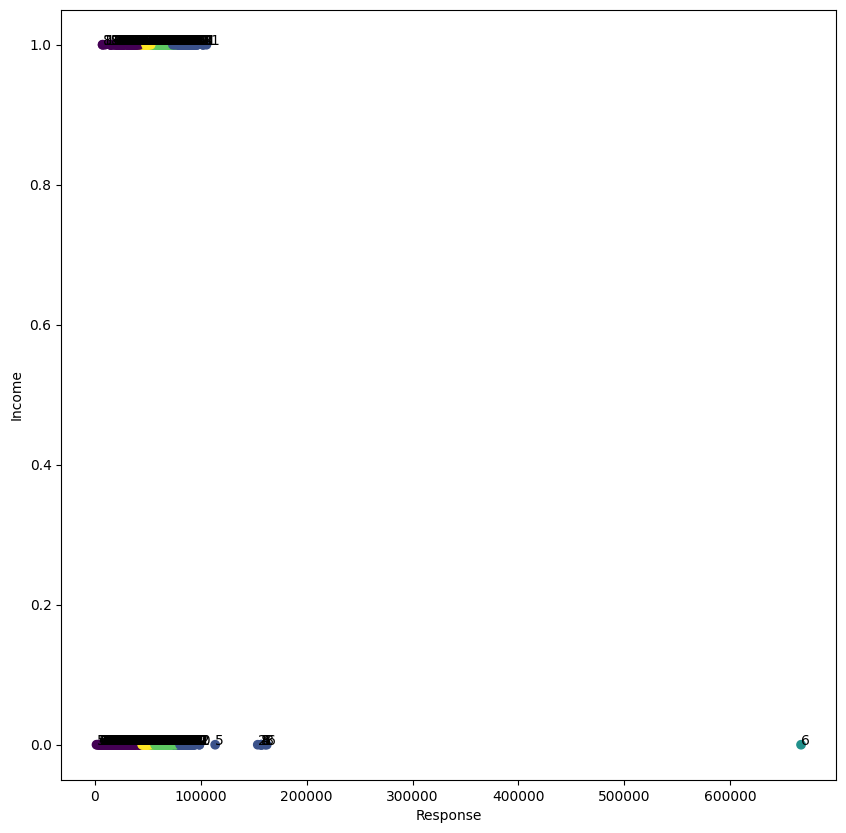

In [77]:

def size(r1, r2):
    plt.figure(figsize=(r1, r2))
    plt.scatter(X["Income"], X["Response"], c = cluster.labels_)
    for i, txt in enumerate(y):
        plt.annotate(txt, (X["Income"][i], X["Response"][i]))

    plt.ylabel("Income")
    plt.xlabel("Response")
    plt.show()  

size(10, 10)

I would say that the K-Means was better because through the elbow graph it was easier to see that the ideal number of clusters was 5. While with the hierarchical clustering it was harder to tell based on the jumbled image shown when having the dendrogram completed. This is why I would like to say that K-Means was the better approach because it was more clear and apparent what the ideal number of clusters where